In [13]:
import numpy as np
from data_cube_analysis import getdata, rms, masks, moments
from astropy import units as u 
from astropy.io import fits
import matplotlib.pyplot as plt
import spectral_cube
import aplpy
from math import ceil
import pyspeckit
import spectral_cube
from glob import glob 
from tqdm.auto import tqdm

plt.style.use('paper')

# plotting fitted gaussians
def gaussian(x, pars):
    a,b,c = pars
    return a*np.exp(-np.power(x-b, 2) / (2*np.power(c, 2)))

In [10]:
files = ['/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/h13cn10.TP_7M_12M_weighted_mosaic.K.kms.galactic.fits',
         '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hnco43.TP_7M_12M_weighted_mosaic.K.kms.galactic.fits',
         '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hc3n1110.TP_7M_12M_weighted_mosaic.K.kms.galactic.fits',
         '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/cs21.TP_7M_12M_weighted_mosaic.K.kms.galactic.fits',
         '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/so3221.TP_7M_12M_weighted_mosaic.K.kms.galactic.fits',
         '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/sio21.TP_7M_12M_weighted_mosaic.K.kms.galactic.fits',
         '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hn13c10.TP_7M_12M_weighted_mosaic.K.kms.galactic.fits',
         '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/h13co+10.TP_7M_12M_weighted_mosaic.K.kms.galactic.fits',
         '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hco+10.TP_7M_12M_weighted_mosaic.K.kms.galactic.fits']

In [11]:
l = 0.8119
b = -0.1868
width = 240/3600/2
height = 240/3600/2
region_str = "galactic; circle(%s, %s, %s\")" %(l,b,width*3600)  

  0%|          | 0/9 [00:00<?, ?it/s]

The DS9Parser class is deprecated and may be removed in a future version.
        Use `regions.Regions.parse` instead.
This function (<function BaseSpectralCube.mean at 0x7fd043915160>) requires loading the entire cube into memory and may therefore be slow.
Slice (slice(None, None, None), None) cannot be used on this 1-dimensional array's WCS.  If this is intentional, you  should use this <class 'spectral_cube.lower_dimensional_structures.OneDSpectrum'>'s ``array``  or ``quantity`` attribute.
The DS9Parser class is deprecated and may be removed in a future version.
        Use `regions.Regions.parse` instead.
This function (<function BaseSpectralCube.mean at 0x7fd043915160>) requires loading the entire cube into memory and may therefore be slow.
Slice (slice(None, None, None), None) cannot be used on this 1-dimensional array's WCS.  If this is intentional, you  should use this <class 'spectral_cube.lower_dimensional_structures.OneDSpectrum'>'s ``array``  or ``quantity`` attribute.
The 

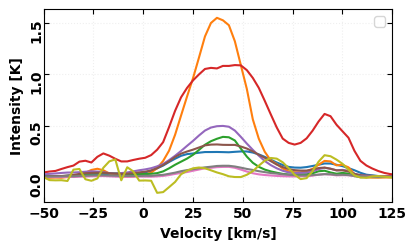

In [16]:
fig, ax = plt.subplots(1,1, figsize=(4.5,2.5))

for file in tqdm(files): 

    cube = spectral_cube.SpectralCube.read(file)
    cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value = cube.hdu.header['RESTFRQ'] * u.Hz)
    cube.allow_huge_operations=True
    sub_cube = cube.subcube_from_ds9region(region_str)
    
    cube_v = sub_cube.spectral_axis
    mean_cube = sub_cube.mean(axis = (1, 2))
    ax.plot(cube_v, mean_cube)

ax.set_xlim([-50, 125])
ax.grid(':', alpha=0.2)
ax.legend(loc='upper right')

ax.set_ylabel('Intensity [K]')
ax.set_xlabel('Velocity [km/s]')

for axis in fig.get_axes():
    axis.tick_params(axis='y', labelrotation=90, pad=0)

# saving figure
plt.savefig('../figures/all_spec.pdf')